# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

In [3]:
os.chdir('C:\Users\chads\Desktop')

See what the dataset looks like..

In [4]:
df = pd.read_csv('human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


Since we are not asked to analyze the heart_rate column, will create a dataframe called temp, which only contains
the temperature column from the original dataframe

In [5]:
temp = df.temperature
temp.head()

0    99.3
1    98.4
2    97.8
3    99.2
4    98.0
Name: temperature, dtype: float64

Created variable mu which provides the temperature mean and also created variable sigma which provides the temperature
standard deviation

In [6]:
mu = np.mean(temp)
sigma = np.std(temp)

print('Temperature mean: ', mu)
print('Temperature standard deviation: ', sigma)

('Temperature mean: ', 98.24923076923078)
('Temperature standard deviation: ', 0.7303577789050377)


Created variable n_bins which provides the number of bins for a histogram according to the square root of the number of 
observations in the dataframe

In [7]:
n_data = len(df)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)
n_bins

11

Visualization of the temperature provided with a histogram, along with an orange line plot of the data distribution

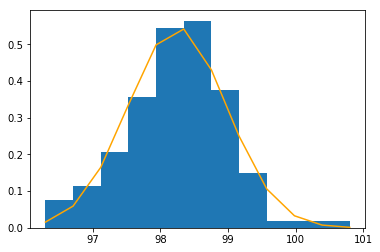

In [8]:
n, bins, patches = plt.hist(temp, n_bins, normed=1)
plt.plot(bins, mlab.normpdf(bins, mu, sigma),color='orange')

In [9]:
import seaborn as sns

Created boxplots of the temperature according to gender. Some outliers appear to be present for the females

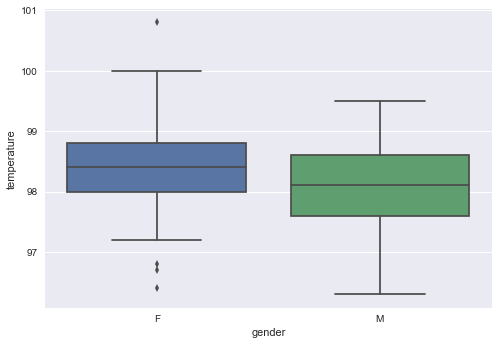

In [10]:
sns.boxplot(x='gender', y='temperature', data=df)
plt.xlabel('gender')
plt.ylabel('temperature')

Checking out some descriptive stats of the temperature

In [11]:
df['temperature'].describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

Created two seperate dataframes, female and male, which contains the temperature data for each gender. Counted to see how
much data was in each gender as well

In [12]:
female = df[df.gender == 'F']
male = df[df.gender == 'M']



Created an empirical cumulative distribution function (ecdf), in order to see the distribution of temperature of males and females next to each other

In [13]:
def ecdf(x):
    xs = np.sort(x)
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys

Only need the temperature data for males and females in order for the ecdf to run

In [14]:
male_temp = male.temperature
female_temp = female.temperature

Females appear to have a wider temperature distribution compared to males, along with at least one outlier at close to 101 degrees

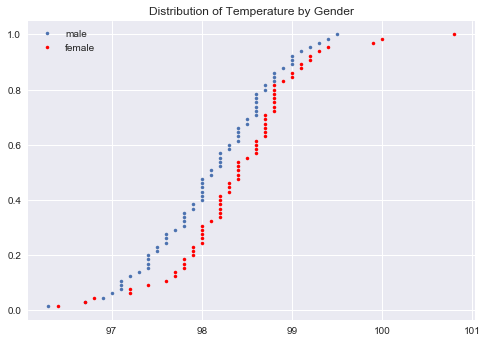

In [15]:
xmale, ymale = ecdf(male_temp)
plt.plot(xmale, ymale, label="male", marker=".", linestyle = 'none')
xfemale, yfemale = ecdf(female_temp)
plt.plot(xfemale, yfemale, label="female", marker=".", linestyle = 'none', markerfacecolor='red')
plt.legend()
plt.title('Distribution of Temperature by Gender')

Checking out the temperature percentiles for males and females

In [16]:
percentiles= np.array([2.5,25,50,75,97.5])

ptiles_male= np.percentile(male_temp,percentiles)
ptiles_female= np.percentile(female_temp,percentiles)

print('Male temperature percentiles (2.5, 25th, 50th, 75th, 97.5): ',ptiles_male)
print('Female temperature percentiles (2.5, 25th, 50th, 75th, 97.5): ',ptiles_female)

('Male temperature percentiles (2.5, 25th, 50th, 75th, 97.5): ', array([ 96.82,  97.6 ,  98.1 ,  98.6 ,  99.34]))
('Female temperature percentiles (2.5, 25th, 50th, 75th, 97.5): ', array([ 96.76,  98.  ,  98.4 ,  98.8 ,  99.94]))


Plotting the percentiles on our ecdf of males and females

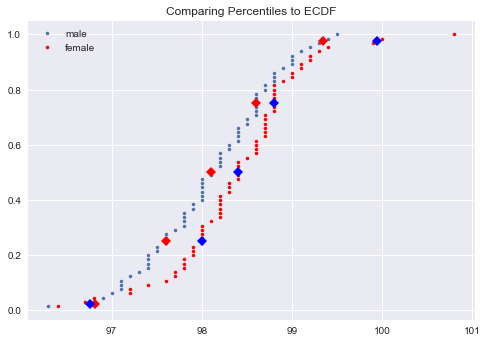

In [17]:
plt.plot(xmale, ymale, label="male", marker=".", linestyle = 'none')
plt.plot(xfemale, yfemale, label="female", marker=".", linestyle = 'none', markerfacecolor='red')

plt.plot(ptiles_male, percentiles/100, marker='D', color='red', linestyle='none')
plt.plot(ptiles_female, percentiles/100, marker='D', color='blue', linestyle='none')
plt.legend()
plt.title('Comparing Percentiles to ECDF')

Back to looking at the temperature of both sexes combined and created variable sample which is a random sample of the same mean and standard deviation of our data with 10000 observations. Did this to make sure our data's distribution didn't just occur due to chance. The red line is the data from the random sample and the blue dots is the data from our temp dataframe. It appears the sample has an identical distribution with the temp dataframe.

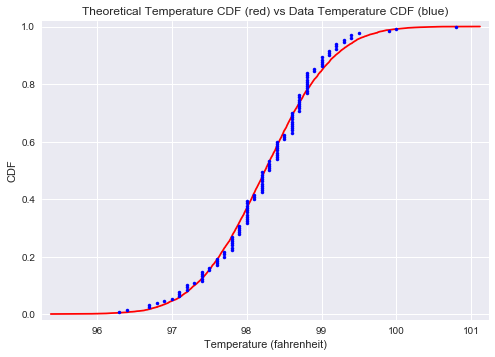

In [18]:
np.random.seed(42)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(temp)

# Plot the CDFs and show the plot
plt.plot(x_theor, y_theor, color='red')
plt.plot(x, y, marker='.', linestyle='none', color='blue')
plt.margins(0.02)
plt.xlabel('Temperature (fahrenheit)')
plt.ylabel('CDF')
plt.title('Theoretical Temperature CDF (red) vs Data Temperature CDF (blue)')

# The theoretical CDF and the CDF of the data suggest that the temperature is, indeed, Normally distributed. 

Get the p-value to test for statistical significance of the temp distribution. Since the p-value is high, > 0.05, fail to reject the null hypothesis that the temperature distribution is normal

In [19]:
import scipy.stats as stats
norm_temp = temp
stats.normaltest(norm_temp)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

Is the true population mean temerature 98.6 degrees? Since we are testing our temp dataset against only one mean value, 98.6 degrees and not against another dataset, we will have to do a one sample hypothesis test.

The null hypothesis is the true mean population temperature is equal to 98.6, while the alternative hypothesis is the true mean population temperature is 98.25 degrees, just like our population mean body temperature.

Since our sample size is >30, 130 observations, this is considered a large sample. Observations are randomly selected and independent of each other. CLT conditions are met for this study.

Since we know the mean of 98.6, we can calculate the z-score, but first we need to compute the standard error

In [21]:
import math

In [22]:
SE= sigma/math.sqrt(len(temp))
SE

0.06405661469519336

Now we can get the z-score...

In [23]:
sample_mu= 98.6
Z = round(float(mu-sample_mu)/SE, 3)
Z

-5.476

Calculate z-score margin of error..

In [24]:
Z_me = Z*SE
Z_me

-0.3507740220708788

We may now calculate the 95% confidence interval for temperature using our t-score

In [25]:
min_CI=mu+Z_me
max_CI=mu-Z_me
print 'Confidence Interval: ',min_CI,max_CI

Confidence Interval:  97.8984567472 98.6000047913


In [27]:
stats.ttest_1samp(temp, sample_mu)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [28]:
T = float(-5.455)

Calculate t-score margin of error..

In [29]:
t_me = T*SE
t_me

-0.3494288331622798

In [30]:
t_min_CI = mu + t_me
t_max_CI = mu - t_me

print(t_min_CI,t_max_CI)

(97.8998019360685, 98.59865960239306)


Create a function that calculates a p-value from a given z-score

In [31]:
import numpy as np
import scipy.special as scsp
def p_value(z):
    """From z-score return p-value."""
    return 0.5 * (1 + scsp.erf(z / np.sqrt(2)))

With an extremely low p-value we can reject the null hypothesis that the true population mean body temperature is 98.6 degrees

In [32]:
p_value(Z)

2.1752384338213915e-08

Create z-score for our alternative hypothesis that the true mean body temperature is < 98.6 degrees

In [33]:
Z_alt = round(float(sample_mu - mu)/SE, 3)
Z_alt

5.476

With an extremely high p-value, fail to reject alternative hypothesis that mean body temperature is < 98.6 degrees

In [34]:
p_value(Z_alt)

0.99999997824761566

In [35]:
p_value(T)

2.4486422778302597e-08

Given our 95% confidence interval of 97.90 - 98.60 degrees, any temperature < 97.90 or > 98.60 could be considered abnormal. 98.6 degrees could be considered a critical value.

Get a random sample of 10 observations from the temp dataframe

In [36]:
np.random.seed(42)

temp_10 = temp.sample(n=10)
print(temp_10)

55     98.6
40     98.4
19     99.4
31     97.6
115    98.0
56     98.8
69     98.9
105    96.7
81     98.0
26     97.8
Name: temperature, dtype: float64


Calculate the mean and standard deviation for temp_10

In [37]:
sigma_10 = np.std(temp_10)
mu_10 = np.mean(temp_10)

print(sigma_10)
print(mu_10)

0.73047929471
98.22


Get the standard error for temp_10

In [38]:
SE_10= sigma_10/math.sqrt(len(temp_10))
SE_10

0.2309978354876949

and the z-score..

In [39]:
Z_10 = round(float(mu_10-sample_mu)/SE_10, 3)
Z_10

-1.645

calculate temp_10 margin of error

In [40]:
Z_10_me = Z_10*SE_10
Z_10_me

-0.3799914393772581

temp_10 confidence interval

In [41]:
min_10_CI= mu_10 + Z_10_me
max_10_CI= mu_10 - Z_10_me
print 'Confidence Interval: ',min_10_CI,max_10_CI

Confidence Interval:  97.8400085606 98.5999914394


temp_10 p-value calculated with the z-score

In [42]:
p_value(Z_10)

0.049984905539121383

temp_10 p-value calculated with the t-score

In [44]:
stats.ttest_1samp(temp_10, sample_mu, axis=0)

Ttest_1sampResult(statistic=-1.5606191828511504, pvalue=0.15304624869561917)

In [45]:
T_10 = float(-1.561)

Calculate temp_10 margin of error

In [46]:
T_10_me = T_10*SE_10
T_10_me

-0.36058762119629173

temp_10 confidence interval

In [47]:
t_min_10_CI= mu_10 + T_10_me
t_max_10_CI= mu_10 - T_10_me
print 'Confidence Interval: ',t_min_10_CI,t_max_10_CI

Confidence Interval:  97.8594123788 98.5805876212


male_temp and female_temp descriptive statistics

In [49]:
male_temp.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In [50]:
female_temp.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

Ho: Mean male temperature = Mean female temperature
Ha: Mean male temperature != Mean female temperature

Passes conditions of CLT with all observations being independent of one another and the number of observations is > 30.

In [51]:
n=65
mu_M = np.mean(male_temp)
mu_F = np.mean(female_temp)
sigma_M = np.std(male_temp)
sigma_F = np.std(female_temp)

Get standard error, mean differential and z-score of the genders

In [54]:
SE_gender = round((((sigma_M**2) + (sigma_F**2))/n)**0.5,2)
mu_diff = round(mu_M - mu_F,2)

In [60]:
Z_gender = round(((mu_diff - 0)/SE_gender),2)

Our Ho falls right on the 0.0 critical value

In [57]:
CI_min= round(mu_diff - (Z * SE_gender),2)
CI_max= round(mu_diff + (Z * SE_gender),2)

print('Mean gender temperature difference confidence interval: ', CI_min,CI_max)

('Mean gender temperature difference confidence interval: ', -0.0, -0.58)


Reject Ho that mean male temperature = mean female temperature, since p-value is < 0.05

In [63]:
# Two sided sample test, since we are comparing the means of 2 different dataframes
p_values = stats.norm.sf(abs(Z_gender))*2
p_values

0.025747442877204027